In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn as skflow

C:\Users\Saumya Suvarna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
route_df = pd.read_excel('route.xls', index_col=None, na_values=['NA'])

In [3]:
route_df.head()

uid                                  name  metro  country    rating  \
0  411  Wick George Dennick (Mary Hitchcock)      0  England  0.016011   
1  136                  Bowerman Elsie Edith      0  England  0.049281   
2  324                        Partner Austen      0  England  0.169474   
3  281           Leader, Dr. Alice (Farnham)      0  England  0.176204   
4  205                     Evans Edith Corse      0  England  0.284004   

   startTime  endTime oldRoute newRoute  mapUsed  
0       16.0     17.3       R3       R3        1  
1       16.0     17.3       R3       R3        1  
2       16.0     17.3       R3       R3        1  
3       16.0     17.3       R3       R3        1  
4       16.0     17.3       R3       R4        0

In [4]:
route_df['mapUsed'].mean()

0.474

In [5]:
route_df.groupby('country').mean()

uid     metro    rating  startTime    endTime   mapUsed
country                                                                
England  348.426036  0.502959  2.403062  16.653846  18.500592  0.455621
Germany  354.237179  0.506410  2.568901  16.654487  18.506410  0.480769
Russia   349.171429  0.514286  2.487564  14.640000  17.000000  0.485714

In [6]:
country_metro_grouping = route_df.groupby(['country','metro']).mean()
country_metro_grouping

uid    rating  startTime    endTime   mapUsed
country metro                                                      
England 0      346.690476  2.526212       16.0  17.300000  0.464286
        1      350.141176  2.281361       17.3  19.687059  0.447059
Germany 0      373.961039  2.515311       16.3  18.000000  0.441558
        1      335.012658  2.621135       17.0  19.000000  0.518987
Russia  0      353.611765  2.548772       15.0  17.000000  0.435294
        1      344.977778  2.429756       14.3  17.000000  0.533333

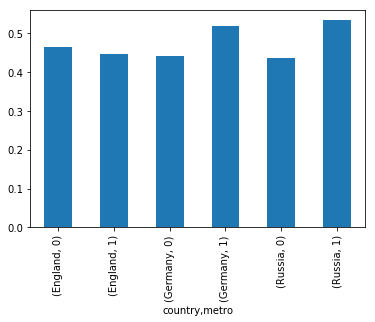

In [7]:
country_metro_grouping['mapUsed'].plot.bar()

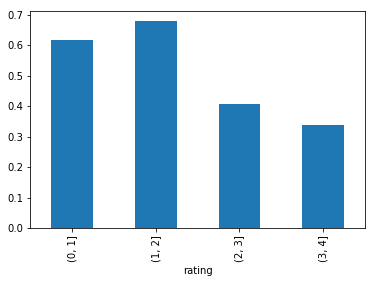

In [8]:
group_by_age = pd.cut(route_df["rating"], np.arange(0, 5, 1))
rating_grouping = route_df.groupby(group_by_age).mean()
rating_grouping['mapUsed'].plot.bar()

In [9]:
route_df.count()

uid          500
name         500
metro        500
country      500
rating       500
startTime    500
endTime      500
oldRoute     500
newRoute     500
mapUsed      500
dtype: int64

In [10]:
def preprocess_route_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.country = le.fit_transform(processed_df.country)
    processed_df.oldRoute = le.fit_transform(processed_df.oldRoute)
    processed_df.newRoute = le.fit_transform(processed_df.newRoute)
    processed_df = processed_df.drop(['name','uid'],axis=1)
    return processed_df

In [11]:
processed_df = preprocess_route_df(route_df)
processed_df

metro  country    rating  startTime  endTime  oldRoute  newRoute  mapUsed
0        0        0  0.016011       16.0     17.3         2         5        1
1        0        0  0.049281       16.0     17.3         2         5        1
2        0        0  0.169474       16.0     17.3         2         5        1
3        0        0  0.176204       16.0     17.3         2         5        1
4        0        0  0.284004       16.0     17.3         2         6        0
5        0        0  0.614796       16.0     17.3         2         5        1
6        0        0  0.633776       16.0     17.3         2         6        0
7        0        0  0.712780       16.0     17.3         2         5        1
8        0        0  0.787276       16.0     17.3         2         5        1
9        0        0  0.822311       16.0     17.3         2         5        1
10       0        0  0.829835       16.0     17.3         2         6        0
11       0        0  0.868657       16.0     17.3         2         5        1
12       0        0  0.919828       16.0     17.3         2         5        1
13       0        0  1.007483       16.0     17.3         2         5        1
14       0        0  1.103939       16.0     17.3         2         5        1
15       0        0  1.129389       16.0     17.3         2         5        1
16       0        0  1.136403       16.0     17.3         2         5        1
17       0        0  1.386064       16.0     17.3         2         5        1
18       0        0  1.414845       16.0     17.3         2         5        1
19       0        0  1.444325       16.0     17.3         2         5        1
20       0        0  1.472965       16.0     17.3         2         5        1
21       0        0  1.481402       16.0     17.3         2         5        1
22       0        0  1.483025       16.0     17.3         2         5        1
23       0        0  1.521224       16.0     17.3         2         5        1
24       0        0  1.680886       16.0     17.3         2         5        1
25       0        0  1.737758       16.0     17.3         2         5        1
26       0        0  1.913498       16.0     17.3         2         5        1
27       0        0  1.924166       16.0     17.3         2         5        1
28       0        0  1.934866       16.0     17.3         2         5        1
29       0        0  2.015483       16.0     17.3         2         5        1
..     ...      ...       ...        ...      ...       ...       ...      ...
470      1        2  3.311774       14.3     17.0         1         3        0
471      1        2  3.357713       14.3     17.0         1         3        0
472      1        2  3.492864       14.3     17.0         1         3        0
473      1        2  3.494193       14.3     17.0         1         3        0
474      1        2  3.547185       14.3     17.0         1         3        0
475      1        2  3.702069       14.3     17.0         1         3        0
476      1        2  3.742632       14.3     17.0         1         3        0
477      1        2  3.745421       14.3     17.0         1         3        0
478      1        2  3.795905       14.3     17.0         1         3        0
479      1        2  3.825862       14.3     17.0         1         3        0
480      1        2  4.009469       14.3     17.0         1         3        0
481      1        2  4.067659       14.3     17.0         1         3        0
482      1        2  4.068963       14.3     17.0         1         3        0
483      1        2  4.289566       14.3     17.0         1         3        0
484      1        2  4.328859       14.3     17.0         1         3        0
485      1        2  4.364985       14.3     17.0         1         3        0
486      1        2  4.369504       14.3     17.0         1         3        0
487      1        2  4.410162       14.3     17.0         1         3        0
488      1        2  4.419123       14.3     17.0      

In [12]:
X = processed_df.drop(['mapUsed'], axis=1).values
y = processed_df['mapUsed'].values

In [13]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

decision tree

In [14]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [15]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.97999999999999998

In [16]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [17]:
test_classifier(clf_dt)

Accuracy: 0.9880 (+/- 0.01)


In [18]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.9960 (+/- 0.00)


In [19]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.9855 (+/- 0.01)


In [20]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.9940 (+/- 0.01)


neural Network

In [21]:
#tf_clf_dnn = skflow.TensorFlowDNNClassifier(hidden_units=[20, 40, 20], n_classes=2, batch_size=256, steps=1000, learning_rate=0.05)
feature_columns = [tf.contrib.layers.real_valued_column("")]
tf_clf_dnn = skflow.DNNClassifier(feature_columns=feature_columns, hidden_units=[20, 40, 20], n_classes=2, model_dir="/tmp")
#tf_clf_dnn.evaluate(batch_size=256, steps=1000)
tf_clf_dnn.fit(X_train, y_train, steps=1000)
accuracy_score = tf_clf_dnn.evaluate(X_test, y_test,steps=1000)["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 0, '_save_summary_steps': 100, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D45DC959B0>, '_save_checkpoints_steps': None, '_master': '', '_model_dir': None, '_keep_checkpoint_max': 5, '_environment': 'local', '_task_id': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_ps_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by mov

C:\Users\Saumya Suvarna\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into /tmp\model.ckpt.
INFO:tensorflow:step = 5001, loss = 0.0404501
INFO:tensorflow:global_step/sec: 85.8898
INFO:tensorflow:step = 5101, loss = 0.0349465 (1.161 sec)
INFO:tensorflow:global_step/sec: 117.988
INFO:tensorflow:step = 5201, loss = 0.0312372 (0.861 sec)
INFO:tensorflow:global_step/sec: 121.162
INFO:tensorflow:step = 5301, loss = 0.0279585 (0.812 sec)
INFO:tensorflow:global_step/sec: 105.06
INFO:tensorflow:step = 5401, loss = 0.0249155 (0.960 sec)
INFO:tensorflow:global_step/sec: 121.117
INFO:tensorflow: